# Outlier Detection

### Author Francesca Naretto

We can divide the outliers into 2 categories: noise records (errors) or anomalies. The first ones may derive from errors in the extraction of the data, hence we should remove them. For the anomalies, instead, we should first detect them. We may have 2 kinds of methods for detecting anomalies: supervised and unsupervised.   

In [21]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.utils.example import visualize

For applying the different techniques available, we can generate randomly a train set and then add some outlier from a different distribution.

In [22]:
np.random.seed(4552)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
print(X_inliers.shape)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
print(X_inliers.shape)

(100, 2)
(200, 2)


In [23]:
# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
print(X_outliers.shape)
Xa = np.r_[X_inliers, X_outliers]
print(Xa.shape)


(20, 2)
(220, 2)


We can now plot the data obtained exploiting different colours for standard records and for outliers.

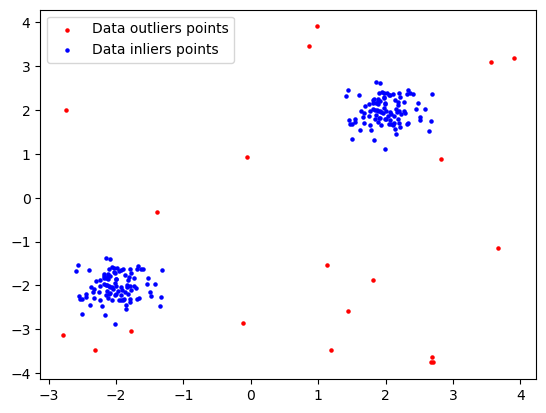

In [16]:
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='r', s=5., label='Data outliers points')
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], color='b', s=5., label='Data inliers points')
plt.legend()
plt.show()

In [27]:
n_outliers = len(X_outliers)
n_outliers

20

### First method: Classification on ground truth
To discover outliers, we can prepare a groudn truth of anomalies on which we can train the machine learning model.
Pay attention to the fact that we are going to have a huge imbalance between the classes for construction. 

In [28]:
ground_truth = np.zeros(len(Xa), dtype=int) #initialize everything to 0
ground_truth[-n_outliers:] = 1 #last 20 are outliers so set 1
ground_truth

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# PyOD Library: https://pyod.readthedocs.io/en/latest/#

In this library you can find a bounch of algorithms for outlier detection. 

First we are going to use KNN, which is a proximity based outlier detection. In this implementation there are 3 methods available:

1. largest: use the distance to the kth neighbor as the outlier score
2. mean: use the average of all k neighbors as the outlier score
3. median: use the median of the distance to k neighbors as the outlier score

You can select the hyper parameters of the KNN as in the classification case. In particular, set the number of neighbors, the algorithm (ball tree, brute, kd tree) and the metric to use for computing the distance.

In [29]:
from pyod.models.knn import KNN

In [30]:
#define and fit the model
clf = KNN(n_neighbors=15, method='largest')
clf.fit(Xa)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=15, p=2,
  radius=1.0)

We can print the decision scores obtained by the KNN. We have a score for each point used for fitting the model (the training set). Higher is the score, more abnormal is the point under analysis.

In [31]:
clf.decision_scores_

array([0.16010559, 0.22896831, 0.17923179, 0.37367375, 0.238907  ,
       0.17443291, 0.50508307, 0.20428352, 0.1870399 , 0.19787414,
       0.20938298, 0.62562367, 0.3377654 , 0.41422037, 0.22625163,
       0.22840483, 0.26964516, 0.17733709, 0.16537989, 0.22699317,
       0.22529457, 0.28237072, 0.17168517, 0.24593491, 0.34738901,
       0.32051851, 0.23335336, 0.20991616, 0.24036141, 0.38124977,
       0.41950901, 0.20310147, 0.19774179, 0.24483278, 0.35104601,
       0.16155763, 0.1683962 , 0.18745695, 0.33980766, 0.17384695,
       0.18123369, 0.19713615, 0.2961025 , 0.33562421, 0.1388588 ,
       0.17337227, 0.24088841, 0.37637675, 0.3523962 , 0.24604207,
       0.26637521, 0.26026843, 0.33857868, 0.39835187, 0.24713855,
       0.18224114, 0.20511435, 0.47692213, 0.22849672, 0.56322499,
       0.17742865, 0.24442584, 0.16297076, 0.19658299, 0.36019833,
       0.19843941, 0.571332  , 0.27712748, 0.22213345, 0.52795084,
       0.18110132, 0.3606397 , 0.1875729 , 0.41344576, 0.26452

In [32]:
outliers = clf.predict(Xa) #test in out test = train
anomaly_score = clf.decision_function(Xa)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([198,  22], dtype=int64))

In [33]:
np.mean(anomaly_score[np.where(outliers==1)])

2.264523498802817

In [34]:
np.mean(anomaly_score[np.where(outliers==0)]) #

0.2553260373961734

In [35]:
np.mean(clf.decision_scores_[np.where(outliers==1)]) #raw outliers

2.2817571249087605

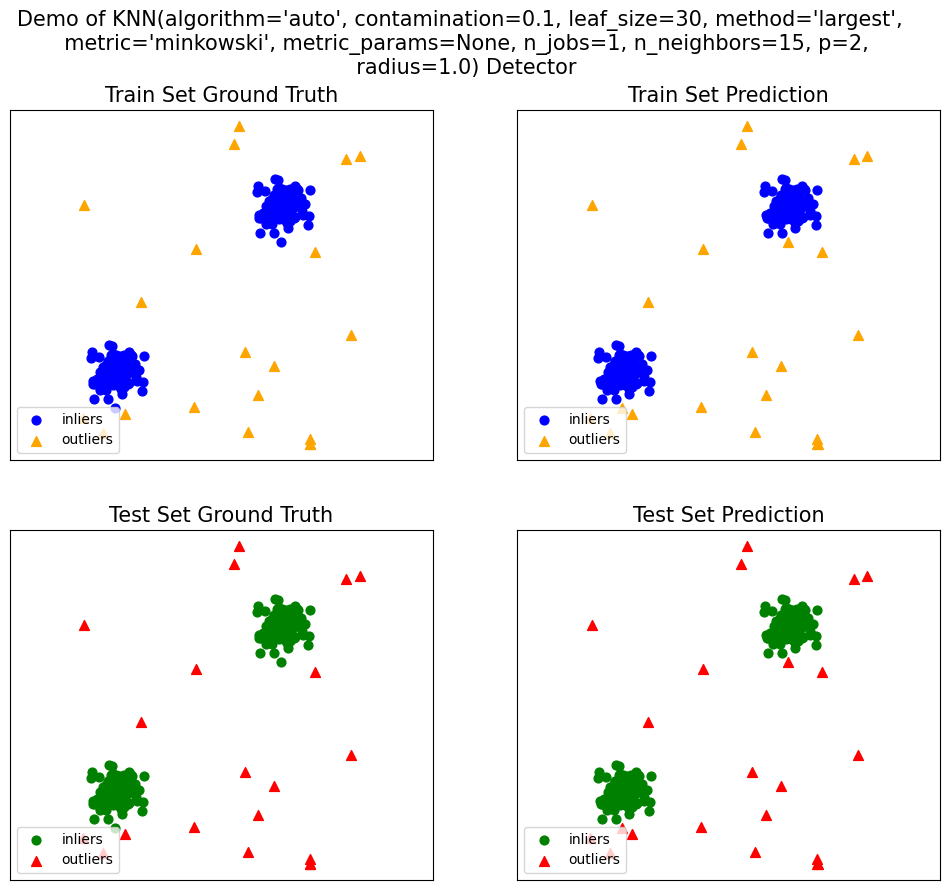

In [36]:
visualize(clf, Xa, ground_truth, Xa, ground_truth, clf.labels_, outliers, show_figure=True, save_figure=False)

# LOF

It is a density-based unsupervised outlier detection method which uses Local Outlier Factor (LOF). LOF is the anomaly score, computed for each sample.
It considers a local density, in which the denisity of a point is relative to that of its k nearest neighbors. 
LOF is computed as the average of the ratios of the density of the sample under analysis and the density of its nearest neighbors. 
The outliers are the ones with largest LOF values.


Since it is based on KNN, you have to set the hyper parameters of KNN.

In [39]:
from pyod.models.lof import LOF
clf = LOF(n_neighbors=15)
clf.fit(Xa)
outliers = clf.predict(Xa)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([200,  20], dtype=int64))

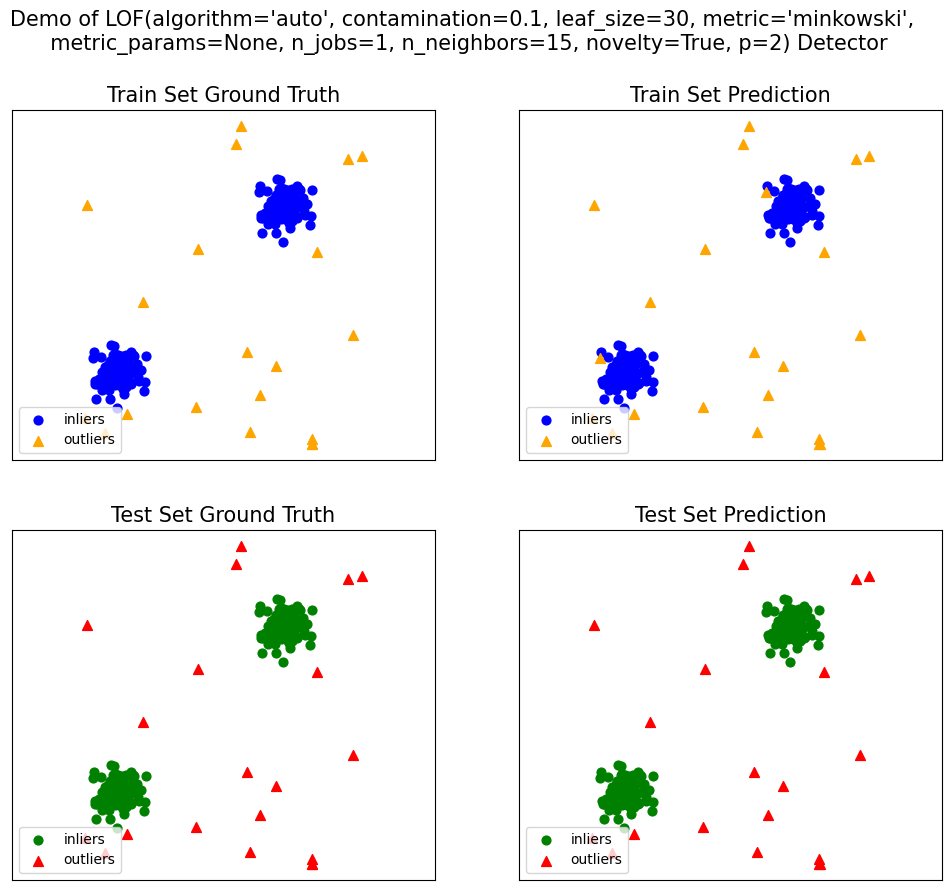

In [40]:
visualize(clf, Xa, ground_truth, Xa, ground_truth, clf.labels_, outliers, show_figure=True, save_figure=False)

# DBSCAN

Another kind of outlier detection algorithms is clustering based. DBSCAN is able to find clusters as well as noise objects. So, we can take the noise set as outlier set.


In [41]:
from sklearn.cluster import DBSCAN

In [42]:
dbscan = DBSCAN(min_samples=15)
dbscan.fit(Xa)

DBSCAN(min_samples=15)

In [43]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([ 19, 100, 101], dtype=int64))

Text(0.5, 1.0, 'DBSCAN')

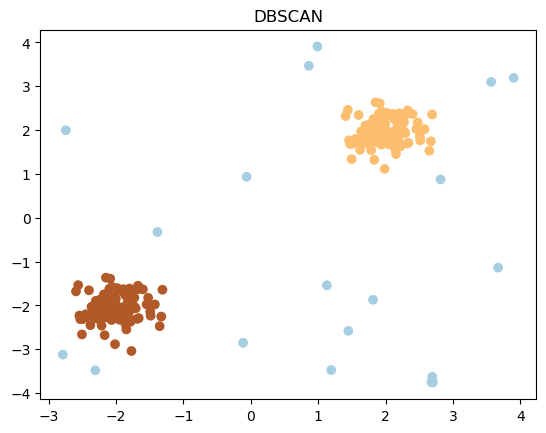

In [44]:
y_pred = dbscan.fit_predict(Xa)
plt.scatter(Xa[:,0], Xa[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")

# Likelihood Approach
Here the idea is that a dataset may contain records from the majority distribution and from the anomalous one. We want to detect the anomalous one and we can do it by exploiting the difference in the log-likehood. The algorithm starts by considering all the data points belonging to the majority distribution. Then, we remove a record from the majority distribution and we recompute again the log likelihood. If the difference between the old likelihood and the new one is greater than a threshold, then the record under analysis is anomalous.  

In [24]:
import numpy as np
from scipy import stats

In [25]:
def norm_dist(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.e**(-((x-mu)**2)/(2*sigma**2))
              
def unif_dist(x, n):
    return 1/n

In [26]:
c = 0.01
lambda_par = 0.3

In [27]:
M = np.copy(Xa)
A = list()
muM = np.mean(M)
sigmaM = np.std(M)
sizeA = len(A)
sumM = np.sum([norm_dist(x, muM, sigmaM) for x in M])
sumA = np.sum([unif_dist(x, sizeA) for x in A])
ll = -(len(M) * np.log(1-lambda_par) + sumM + len(A) * np.log(lambda_par) + sumA)

In [28]:
norm_dist(15, muM, sigmaM)

9.047371942156443e-13

In [29]:
for i, x in enumerate(Xa):
    A.append(x)
    M = np.array([xo for j, xo in enumerate(Xa) if i!=j])
    muM = np.mean(M)
    sigmaM = np.std(M)
    sizeA = len(A)
    sumM = np.sum([norm_dist(x, muM, sigmaM) for x in M])
    sumA = np.sum([unif_dist(x, sizeA) for x in A])
    ll_xi = - (len(M) * np.log(1-lambda_par) + sumM + len(A) * np.log(lambda_par) + sumA)
    delta_ll = ll - ll_xi
    print(i, delta_ll, 'outlier' if delta_ll > c else 'inlier')
    M = np.copy(Xa)
    A = list()

0 -0.10078592941051312 inlier
1 -0.06608190281165349 inlier
2 -0.08912255971081606 inlier
3 -0.09119985349349236 inlier
4 -0.06341922459424154 inlier
5 -0.08930676281996597 inlier
6 -0.10328226239118266 inlier
7 -0.08127015572302554 inlier
8 -0.08911214198459305 inlier
9 -0.1105307235939037 inlier
10 -0.11241428571545242 inlier
11 -0.13829062352559873 inlier
12 -0.047324363076747034 inlier
13 -0.1340042160998962 inlier
14 -0.07133930771511388 inlier
15 -0.08086200523010234 inlier
16 -0.1119199508511528 inlier
17 -0.10416913896501967 inlier
18 -0.1040241960508439 inlier
19 -0.06607327728186618 inlier
20 -0.11232038766554808 inlier
21 -0.0975902991712232 inlier
22 -0.09481863556637649 inlier
23 -0.05743601119556985 inlier
24 -0.059393455416632435 inlier
25 -0.12851207802402342 inlier
26 -0.1122166258952646 inlier
27 -0.07755562286084228 inlier
28 -0.10003520244427477 inlier
29 -0.13631045538974718 inlier
30 -0.05917292965018106 inlier
31 -0.09506217418266516 inlier
32 -0.1030857730761383